In [1]:
%matplotlib nbagg

# Cálculo das probabilidades de fluxos no modelo da minha tese

In [2]:
from sympy import *
from sympy_recursive import Recursive
# Eviar mudança do sympy_recursive para python3
from sympy.abc import s, t

In [3]:
init_session()

IPython console for SymPy 1.1.2.dev (Python 3.5.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/dev



In [2]:
# Code sample from github.com/hejmsdz/sympy_recursive

n = Symbol('n')

# create the sequence
fib = Recursive('fib')
fib.index = n

# input the first items
fib[0] = 1
fib[1] = 1

# provide a recursive formula
fib[n] = fib[n-1] + fib[n-2]

# resolve it
explicit = fib.resolve()

# test
for i in range(10):
    value = explicit.subs(n, i).simplify()
    print("fib[{}] = {}".format(i, value))

fib[0] = 1
fib[1] = 1
fib[2] = 2
fib[3] = 3
fib[4] = 5
fib[5] = 8
fib[6] = 13
fib[7] = 21
fib[8] = 34
fib[9] = 55


In [48]:
def PI(f,z):
    return f(z)

def recPI(z,expr):
    return (4/z*sinh(z/4)*expr)**2

In [56]:
a = Symbol('a', positive=True)
expr = recPI(z,exp(-z/2))
aux = expr.rewrite(exp).expand()

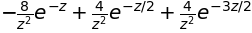

In [51]:
aux

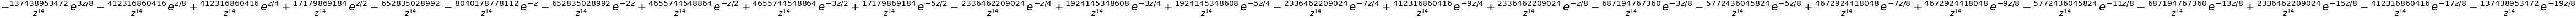

In [57]:
for i in range(2):
    replace = [[z,z/2]]
    expr = expr.subs(replace)
    expr = recPI(z,expr)
expr.rewrite(exp).expand()

In [61]:
def PIsy(z,j,n):
    return Product((2**(k+1)/z*sinh(z/2**(k+1)))**(2**k), (k, 1, n))

def PI(z,j,n):
    a = Symbol('a',positive=True)
    aux = exp(-j*z)*Product((a**(k+1)/z*sinh(z/a**(k+1)))**(2**k), (k, 1, n)).doit()
    aux = aux.rewrite(exp).expand()
    return aux

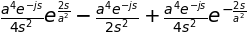

In [62]:
PI(s,Symbol('j',positive=True),1)

In [65]:
a, b, c = symbols('a b c', positive=True)
expr = a*exp(-s*b)/s**c
inverse_laplace_transform(expr,s,t)

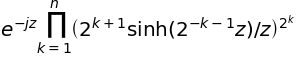

In [63]:
PIsy(z,Symbol('j'),n)

Cada $\sinh$ dará um binômio com $2^k+1$ termos, como são $n$ binômios com expoentes 2, 4, 8, ..., $2^n$. O total de termos é $\prod_{k=1}^{n}(2^k+1)$

In [6]:
def nterms(n):
    return Product(2**k+1, (k,1,n)).doit()

In [66]:
nterms(2)

In [8]:
%%time
a = inverse_laplace_transform(PI(s,2,1), s, t)

CPU times: user 2.23 s, sys: 0 ns, total: 2.23 s
Wall time: 2.31 s


In [9]:
%%time
b = inverse_laplace_transform(PI(s,2,2), s, t)

CPU times: user 11.9 s, sys: 3.26 ms, total: 11.9 s
Wall time: 11.9 s


In [10]:
%%time
c = inverse_laplace_transform(PI(s,2,3), s, t)

CPU times: user 2min 42s, sys: 40.8 ms, total: 2min 42s
Wall time: 2min 42s


In [24]:
def Gausian(x,xm,sd):
    return 1/sqrt(2*pi*sd*sd)*exp(-(x-xm)*(x-xm)/(2*sd*sd))

In [53]:
pa = plot(a,(t,0,4),show=False,line_color='black')
pb = plot(b,(t,0,4),show=False,line_color='blue')
pc = plot(c,(t,0,4),show=False,line_color='green')

In [54]:
g = plot(Gausian(t,2,0.275),(t,0,4),show=False,line_color='red')

In [55]:
pa.extend(pb)

In [56]:
pa.extend(pc)

In [57]:
pa.extend(g)

<IPython.core.display.Javascript object>


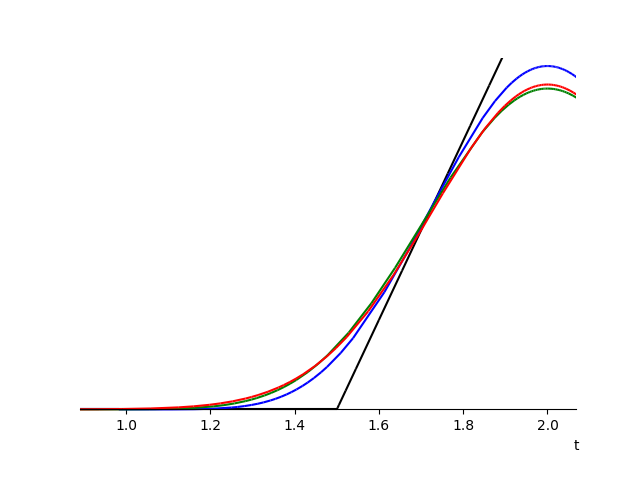

In [58]:
pa.show()

In [17]:
plotting.plot((a, line_color='red'),(b,line_color='blue'),(c,line_color='green'),(t,2-2,2+2))

SyntaxError: invalid syntax (<ipython-input-17-a2e737f18e65>, line 1)